Importing all libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Loading the data of fmnist

In [3]:
fashion = tf.keras.datasets.fashion_mnist
fashion

<module 'keras.datasets.fashion_mnist' from 'c:\\Users\\Inshal Munaf\\VsCodeProjects\\ML\\.venv\\Lib\\site-packages\\keras\\datasets\\fashion_mnist\\__init__.py'>

Loading the data

In [14]:
(X_train,Y_train),(X_test,Y_test) = fashion.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
Y_train.shape

(60000,)

In [16]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Preprocess the data  1) visualize

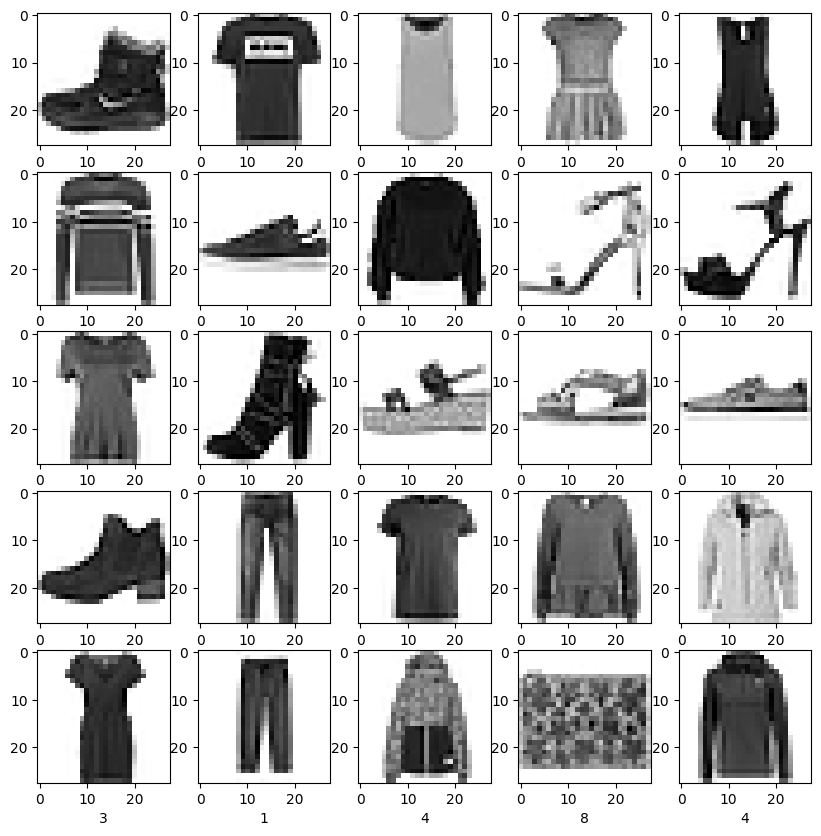

In [9]:
plt.figure(figsize=(10,10))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(X_train[i] , cmap=plt.cm.binary)
    plt.xlabel(Y_train[i])

2)Normalize

In [17]:
X_train = X_train/255
X_test = X_test/255


In [18]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

3)Reshaping

In [21]:
X_train.shape

(60000, 28, 28)

In [24]:
X_train= X_train.reshape(X_train.shape + (1,))
X_test= X_test.reshape(X_test.shape + (1,))
X_train.shape

(60000, 28, 28, 1)

4) converting to float

In [32]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

Model Building --> CNN CONVO2D

In [27]:
model= tf.keras.Sequential([
    #Input Layer
    layers.Conv2D(filters = 10 ,kernel_size= (3,3) ,activation= 'relu' , input_shape =(28,28,1)),
    #HiddenLayer
    layers.Conv2D(filters = 10 ,kernel_size= (3,3) ,activation= 'relu' ),
    layers.Conv2D(filters = 10 ,kernel_size= (3,3) ,activation= 'relu' ),
    layers.MaxPool2D(),
    layers.Conv2D(filters = 10 ,kernel_size= (3,3) ,activation= 'relu' ),
    layers.Conv2D(filters = 10 ,kernel_size= (3,3) ,activation= 'relu' ),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(10,activation='sigmoid'),   
])

c:\Users\Inshal Munaf\VsCodeProjects\ML\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


model compilation 

In [30]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

Model fit

In [34]:
model.fit(X_train,Y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8190 - loss: 0.4840
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8420 - loss: 0.4220
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8551 - loss: 0.3954
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8584 - loss: 0.3807
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8682 - loss: 0.3628


Evaluating the model

In [36]:
model_loss, model_Accuracy = model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8639 - loss: 0.3810


In [42]:
print('Model loss : ' ,model_loss)
print('Model Accuracy : ' , round(model_Accuracy*100))

Model loss :  0.38579288125038147
Model Accuracy :  86


Now We will test any image from data

In [46]:
X_train[0].shape

(28, 28, 1)

In [48]:
X_batch1= X_train[:5]

In [51]:
X_batch1

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.16078432],
        [0.7372549 ],
        [0.40392157],
        [0.21176471],
        [0.1882353 ],
        [0.16862746],
        [0.34117648],
        [0.65882355],
        [0.52156866],
        [0.0627451 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.00392157],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.19215687],
        [0.53333336],
        [0.85882354],
        [0.84705883],
        [0.89411765],
        [0.9254902 ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        

In [52]:
prediction = model.predict(X_batch1)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


array([[1.0091166e-03, 1.3675589e-02, 2.3999055e-05, 2.8829640e-05,
        4.2891083e-05, 8.5646296e-01, 6.9756992e-03, 9.8397660e-01,
        1.5305047e-01, 9.9989051e-01],
       [9.9793941e-01, 2.0609784e-03, 6.5575039e-01, 2.9523388e-01,
        3.1556915e-03, 8.8010973e-05, 3.9650056e-01, 1.1908905e-06,
        2.9216371e-02, 4.1432186e-06],
       [1.9058761e-01, 1.4217917e-03, 6.9107569e-04, 5.2055514e-01,
        3.2075257e-03, 4.7061050e-05, 3.4445640e-02, 2.6188814e-05,
        5.1419213e-03, 2.9131908e-05],
       [5.8341515e-01, 1.5520374e-02, 5.1954938e-03, 4.1630259e-01,
        3.5184959e-03, 9.3990011e-06, 4.2149761e-01, 1.7268068e-08,
        8.8633335e-04, 9.5567664e-08],
       [4.5010889e-01, 7.8757660e-04, 8.1656661e-05, 7.4582195e-01,
        3.2709158e-05, 8.7164690e-06, 4.1974065e-01, 1.0848958e-07,
        4.2272176e-04, 8.2362803e-08]], dtype=float32)

In [57]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

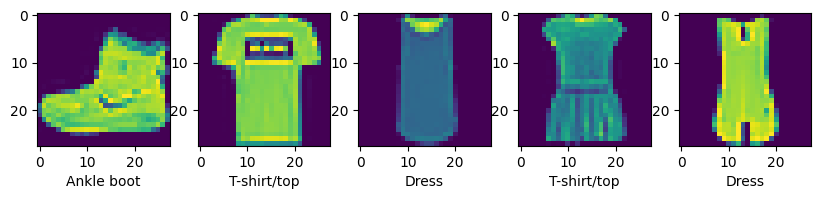

In [61]:
plt.figure(figsize=(10,10))
for i in range(len(prediction)):
    plt.subplot(5,5,i+1)
    plt.imshow(X_batch1[i])
    plt.xlabel(class_names[prediction[i].argmax()])